# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# #check if the api is imported
# weather_api_key

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



In [4]:
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#testing if the url with api key works
city_name = "raleigh"
url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
print(url)


https://api.openweathermap.org/data/2.5/weather?q=raleigh&appid=7cb547d52cbe6a055ba464e6b414fe90


In [6]:
# # Set the API base URL
# url = f"https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}"

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = f"{url}&q={city}"
    
# city_weather = requests.get(city_url)
# city_weather_json = city_weather.json()
# print(city_weather_json)


In [18]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    

# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    #Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    if record_count == 100:
        break              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | camana
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | la'ie
Processing Record 10 of Set 1 | jingmen
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | selfoss
Processing Record 13 of Set 1 | vilyuchinsk
Processing Record 14 of Set 1 | sultanah
Processing Record 15 of Set 1 | hobyo
Processing Record 16 of Set 1 | bodaybo
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | nishinoomote
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | kapuskasing
Processing Record 22 of Set 1 | cidreira
Processing Record 23 of 

In [8]:
city_data

[{'City': 'port alfred',
  'Lat': -33.5906,
  'Lng': 26.891,
  'Max Temp': 60.19,
  'Humidity': 76,
  'Cloudiness': 54,
  'Wind Speed': 10.33,
  'Country': 'ZA',
  'Date': 1684096077},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 33.96,
  'Humidity': 98,
  'Cloudiness': 100,
  'Wind Speed': 13.65,
  'Country': 'GS',
  'Date': 1684096077},
 {'City': 'hithadhoo',
  'Lat': -0.6,
  'Lng': 73.0833,
  'Max Temp': 83.34,
  'Humidity': 78,
  'Cloudiness': 100,
  'Wind Speed': 16.42,
  'Country': 'MV',
  'Date': 1684096078},
 {'City': 'camana',
  'Lat': -16.6228,
  'Lng': -72.7111,
  'Max Temp': 72.43,
  'Humidity': 73,
  'Cloudiness': 4,
  'Wind Speed': 5.95,
  'Country': 'PE',
  'Date': 1684096078},
 {'City': 'dudinka',
  'Lat': 69.4058,
  'Lng': 86.1778,
  'Max Temp': 10.35,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 7.92,
  'Country': 'RU',
  'Date': 1684096079},
 {'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 55.06,
  'Hu

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,60.19,76,54,10.33,ZA,1684096077
1,grytviken,-54.2811,-36.5092,33.96,98,100,13.65,GS,1684096077
2,hithadhoo,-0.6000,73.0833,83.34,78,100,16.42,MV,1684096078
3,camana,-16.6228,-72.7111,72.43,73,4,5.95,PE,1684096078
4,dudinka,69.4058,86.1778,10.35,96,100,7.92,RU,1684096079


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv",  index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,59.18,77,56,9.78,ZA,1684096575
1,grytviken,-54.2811,-36.5092,34.29,97,100,13.89,GS,1684096576
2,hithadhoo,-0.6000,73.0833,83.17,79,100,16.89,MV,1684096576
3,camana,-16.6228,-72.7111,72.43,73,4,5.95,PE,1684096078
4,dudinka,69.4058,86.1778,11.64,96,100,9.53,RU,1684096336
...,...,...,...,...,...,...,...,...,...
568,kangaba,11.9333,-8.4167,86.65,41,66,4.03,ML,1684096869
569,lospalos,-8.5186,127.0025,69.53,88,100,5.41,TL,1684096870
570,namibe,-15.1961,12.1522,70.81,78,0,3.96,AO,1684096870


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

LinregressResult(slope=-0.19089269703523984, intercept=69.90911076261705, rvalue=-0.3489049250546094, pvalue=7.595739799652337e-18, stderr=0.021457396937585603, intercept_stderr=0.8016970732123185)


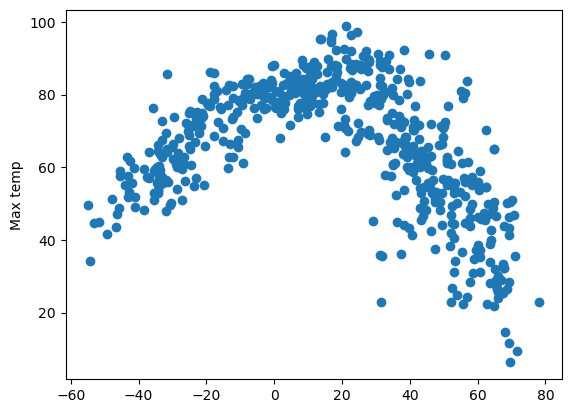

In [31]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
xs = city_data_df["Lat"]
ys = city_data_df["Max Temp"]
plt.scatter(xs , ys)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel("Max temp")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

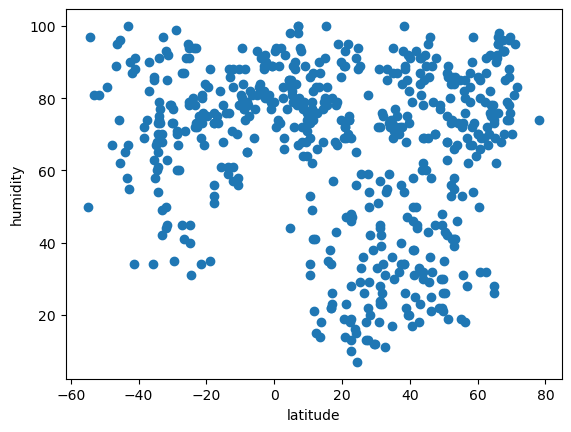

In [23]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
xs = city_data_df["Lat"]
ys = city_data_df["Humidity"]
plt.scatter(xs , ys)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel("humidity")
plt.xlabel("latitude")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

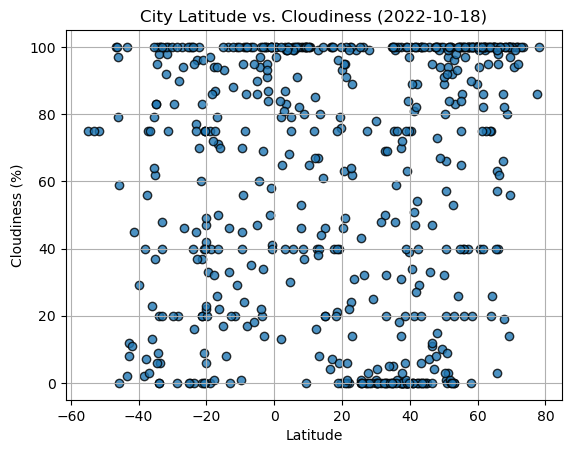

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

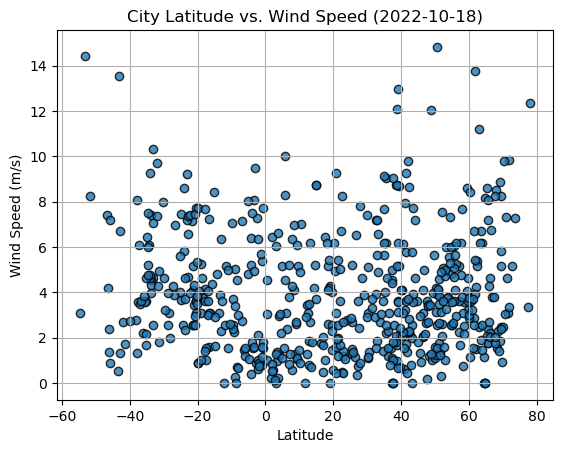

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
print(linregress(xs,ys))

LinregressResult(slope=-0.19089269703523984, intercept=69.90911076261705, rvalue=-0.3489049250546094, pvalue=7.595739799652337e-18, stderr=0.021457396937585603, intercept_stderr=0.8016970732123185)


In [50]:

def linear_regress(xs,ys):
    linear_regression_data = linregress(xs,ys)
    #LinregressResult(slope, intercept, rvalue, pvalue, stderr, intercept_stderr)
    reg_line_eq = linear_regression_data[0] * xs + linear_regression_data[1]
    plt.plot(xs, reg_line_eq , color='r')
  

## refrence 
### https://www.freecodecamp.org/news/how-to-change-color-in-matplotlib/
### 

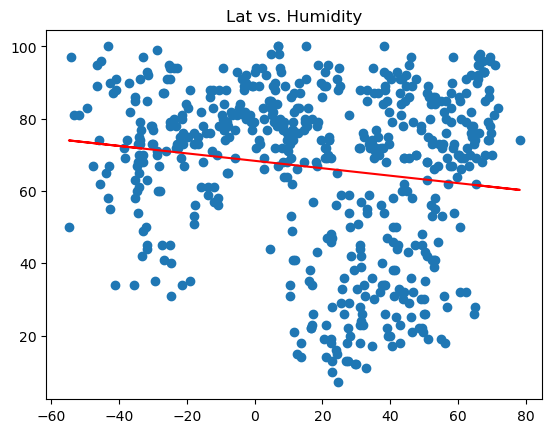

In [56]:
#Define a function to create Linear Regression plots
#YOUR CODE HERE
def create_chart (xs,ys,title):
    plt.scatter(xs , ys)
    plt.plot
    plt.title(title)
    



xs = city_data_df["Lat"]
ys = city_data_df["Humidity"]
title = "Lat vs. Humidity"
create_chart(xs,ys , title)
linear_regress(xs , ys)


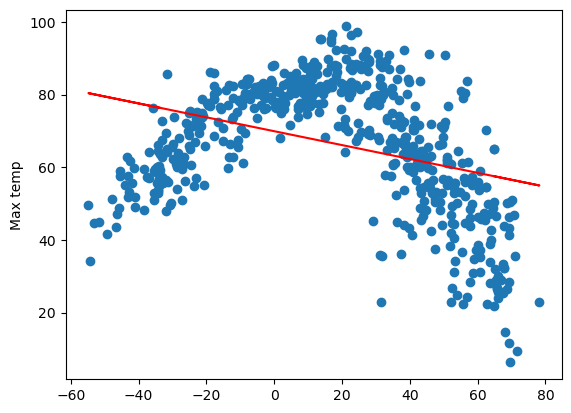

In [46]:
xs = city_data_df["Lat"]
ys = city_data_df["Max Temp"]
plt.scatter(xs , ys)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel("Max temp")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot

linear_regress(xs,ys)

plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


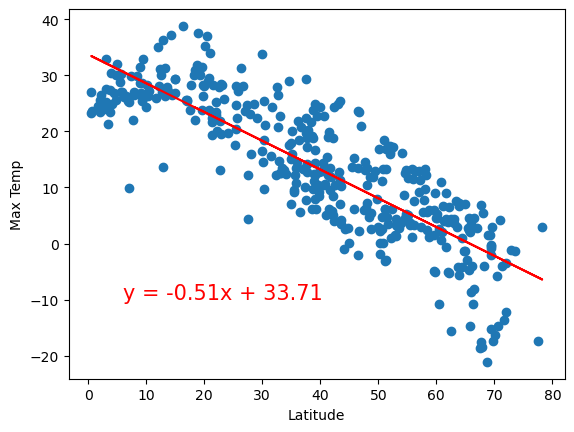

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


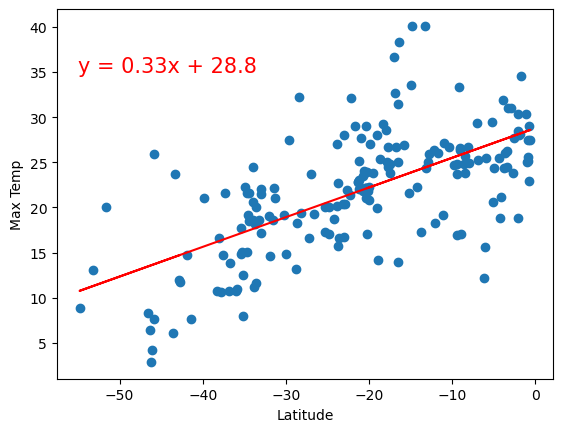

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


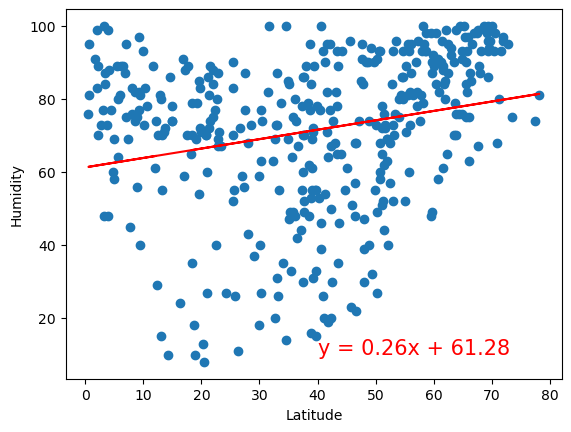

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


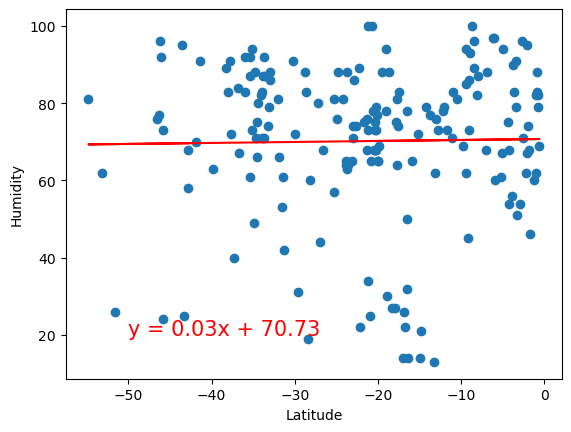

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


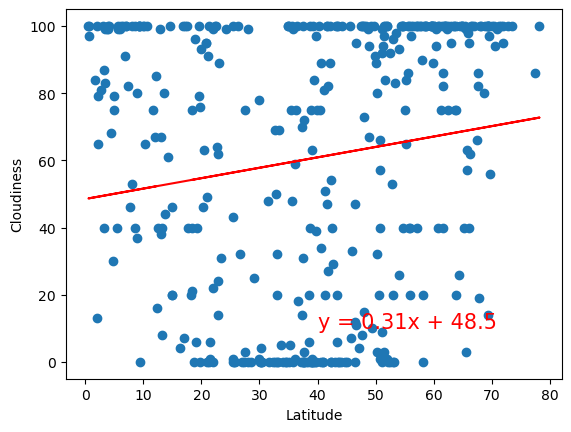

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


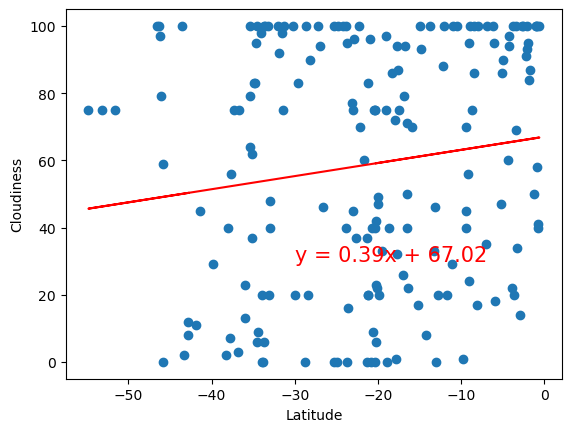

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


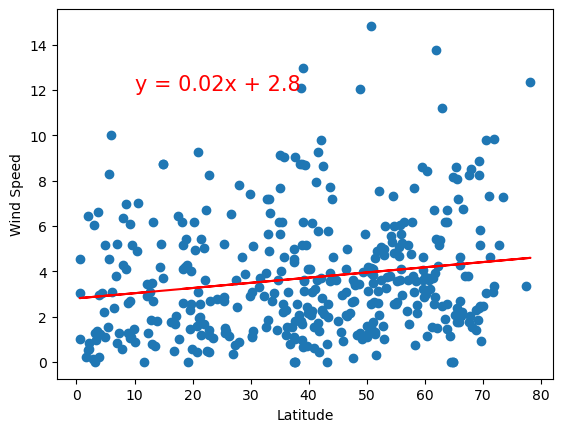

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


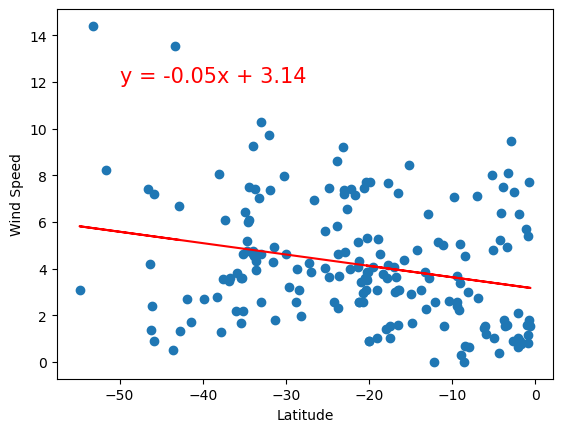

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE